## Exercise 6 (Calculation of $\pi$)

Consider a circle of diameter d surrounded by a square of length $l$ $(l \ge d)$.Random coordinates are generated within the square the value of $\pi$ can be calculated from the fractions of points that fall within the circle. 

---
### 1. How can $\pi$ be calculated from the fraction of points that fall in the circle?
*---

### Solution:
This is a classic example of Monte Carlo method of integration. The area of the circle of diameter $d$ is $\pi d^2/4$. And that of a square is $l^2$. If we start to pick points randomly from the square then what is the probability that the point also lies in the circle. This is $$P(\mathrm{Circle})=\frac{\pi d^2 /4}{l^2}$$. If take some points then due to law of large numbers as we keep taking more points in the square the ratio 

$$\frac{\mathrm{Number Of Points in Circle}}{\mathrm{Total Points}} = P(\mathrm{Circle})$$

Using this we can calculate the value of $\pi$ if we know $l$ and $d$

___
### 2. Complete a small Monte Carlo program to calculate $\pi$ using this method. 
*___

In [20]:
import numpy as np 

def calculate_pi(l, d, trials=100000):
    d = d/l
    r = d/2.0
    l = 1
    sample = np.random.random((trials,2))
    counter = 0
    sample = sample - np.array([0.5,0.5])
    norms = np.linalg.norm(sample, axis=1)
    for k in norms:
        if k < r:
            counter += 1
    pi = (float(counter) / float(trials)) * (4.0 / float(d) ** 2.0)
    return pi

In [2]:
calculate_pi(1.0,1.0, 5000000)

3.1402512

---
### 3. How does the accuracy of the result depend on the ratio $l/d$ and the number of generated coordinates? Derive a formula to calculate the relative standard deviation in the estimate of $\pi$.
---

### Solution:
**Change in accuracy with number of generated coordinates.**

In [26]:
import matplotlib.pyplot as plt

def number_of_coordinates(cycles =20):
    trials = range(1,7)
    relative_error = []
    for k in trials:
        re = 0
        for i in range(cycles):
            pi = calculate_pi(1, 1, 10 ** k)
            re += np.abs(np.pi-pi)/np.pi
        re = re / cycles
        print re
        relative_error.append(re)
    plt.figure(1)
    plt.subplot(111)
    plt.plot(trials, relative_error, 'ro')
    plt.xlabel('log(Number of Trials)')
    plt.ylabel('Relative error')
    
    plt.figure(2)
    plt.subplot(111)
    plt.plot(trials, np.log10(relative_error), 'ro')
    plt.xlabel('log(Number of Trials)')
    plt.ylabel('log(Relative error)')
    plt.show()

0.0928450952891
0.0473126461084
0.0231470272363
0.00391024846334
0.00163343651444
0.000414821443675


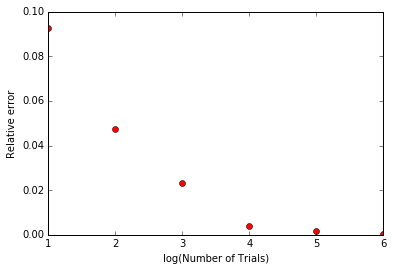

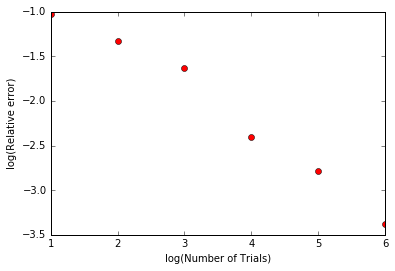

In [27]:
number_of_coordinates(10)

As shown above the increse in number of trials improves the accuracy. It can be seen in the second graph that increasing to improve the accuracy by one order of magnitude we need to increase number of trials by 2 order of magnitude as we can see that the slope is nearly -2.5/5 = -0.5. 

**Change with change in l/d.**

In [28]:
def ratio_change(cycles=20):
    l = 1
    d = np.arange(0.1,1,0.1)
    relative_error = []
    for k in d:
        re = 0
        for i in range(cycles):
            pi = calculate_pi(1, k, 100000)
            re += np.abs(np.pi-pi)/np.pi
        re = re / cycles
        print re
        relative_error.append(re)
    plt.figure(1)
    plt.subplot(111)
    plt.plot(d, relative_error, 'ro')
    plt.xlabel('l/d')
    plt.ylabel('Relative error')
    
    plt.figure(2)
    plt.subplot(111)
    plt.plot(d, np.log10(relative_error), 'ro')
    plt.xlabel('l/d')
    plt.ylabel('log(Relative error)')
    plt.show()

0.0277055365978
0.0111361341976
0.00855035500253
0.00850957735684
0.00539884746101
0.00409362103199
0.00318651145663
0.00287414281364
0.00142256751982


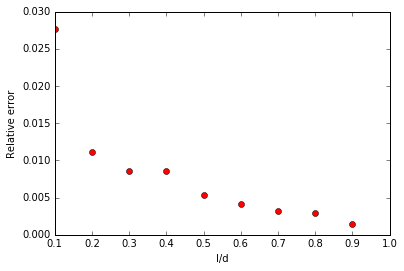

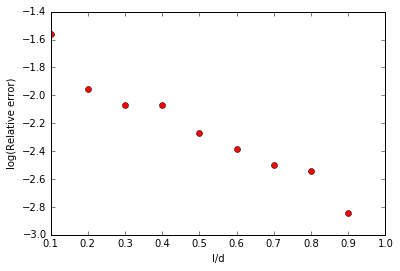

In [29]:
ratio_change(30)

It can be seen from the plots that increasing l/d improves the accuracy.

**Error in calculation of pi.**
1. Say the probability that the point lies inside the circle is $p$. 

2. Say we have N random points in the square, of which k lie inside the circle. 

3. The probability that k points lie inside the circle is $\binom{N}{k}p^k(1-p)^{N-k}$. 

4. The error in estimate of $\pi$ is $e=||\pi-(N/k)||$. 

5. So the expected value of error $E(e) = \sum_{k=0}^{k=N}||\pi-(N/k)||\binom{N}{k}p^k(1-p)^{N-k}$?

___
___


## Exercise 7 (Photon Gas)
The average occupancy number of state j of the photon gas, $\langle \eta_j \rangle$, can be calculated analytically. It is possible to estimate this quality using a Monte Carlo Scheme. In this exercise, we will use the following procedure to calculate $\langle \eta_j \rangle$:

1. Start with arbitrary $\eta_j $.
2. Decide at random to perform a trial move to increase or decrease $ \eta_j $ by 1. 
3. Accept the trial move with probability 
$$\mathrm{acc(o\rightarrow n}=\mathrm{min(}1, \exp{[-\beta(U(n)-U(o))]}$$
Of course, $\eta_j$ cannot become negetive.  


___
### 1. Does this scheme obey detailed balance when $\eta_j=0$? 
___